<a href="https://colab.research.google.com/github/rajgurubhosale/Resale-car-price-prediction/blob/main/EDA_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Stastical Overview of Data

* engine_capactiy has 0 for <600 in some places (try capping or removing while featire enginering)
* kms_drieven outlier
* create how much old car is



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/used car price/clean_df.csv')

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.sample(4)

,full_name,engine_capacity,resale_price,registered_year,insurance,transmission_type,kms_driven,owner_type,fuel_type,brand
4110,Alto 800,796.0,280000.0,2018,Third,Manual,70000.0,First,Petrol,Maruti
4611,Seltos HTX,1497.0,1290000.0,2020,First,Manual,33000.0,First,Petrol,Kia
1702,Octavia 1.8,1798.0,1508000.0,2019,Third,Automatic,67896.0,First,Petrol,Skoda
8283,New Accord,2354.0,200000.0,2006,Third,Manual,100000.0,Second,Petrol,Honda


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17128 entries, 0 to 17127
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17128 non-null  object 
 1   engine_capacity    17118 non-null  float64
 2   resale_price       17128 non-null  float64
 3   registered_year    17128 non-null  int64  
 4   insurance          17121 non-null  object 
 5   transmission_type  17128 non-null  object 
 6   kms_driven         17125 non-null  float64
 7   owner_type         17085 non-null  object 
 8   fuel_type          17128 non-null  object 
 9   brand              17128 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,engine_capacity,resale_price,registered_year,kms_driven
count,17118.000000,1.712800e+04,17128.000000,1.712500e+04
mean,1424.279413,8.601065e+05,2016.343765,5.873409e+04
std,463.561684,9.625638e+05,3.658927,6.466280e+04
min,72.000000,2.800000e+04,2001.000000,2.860000e+02
25%,1197.000000,3.800000e+05,2014.000000,3.200000e+04
50%,1248.000000,5.850000e+05,2017.000000,5.500000e+04
75%,1498.000000,9.000000e+05,2019.000000,7.978300e+04
max,5998.000000,9.700000e+06,2023.000000,6.275000e+06


<ipython-input-44-92d6b0101a09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


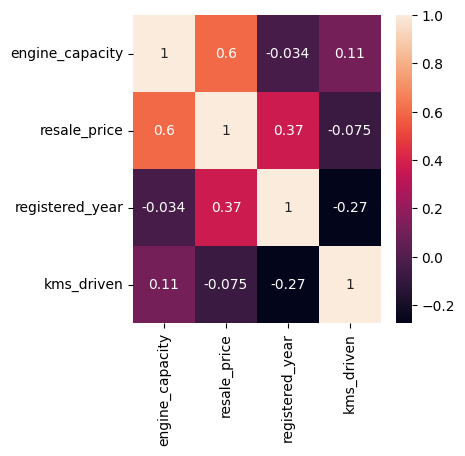

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

<ipython-input-46-7053a9ec3029>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[(df['engine_capacity'] > 600 )&(df['kms_driven'] < 153000) ].corr(),annot=True)


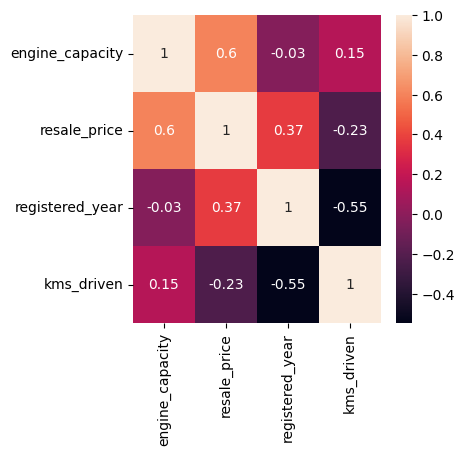

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(df[(df['engine_capacity'] > 600 )&(df['kms_driven'] < 153000) ].corr(),annot=True)
plt.show()

Conclusion: Simply after removing engine_capacitiy (wrong input values) <1 & kms_drieven which is larger than 1.53 lakh (outlier and wrong input values)
correlation changes for engine 0.55 -> 0.6 & -0.077 -> -0.23 it will be useful for feature engineering

In [ ]:
#percentage of data missing
print(df.isnull().sum() / len(df) * 100)

full_name            0.000000
engine_capacity      0.058384
resale_price         0.000000
registered_year      0.000000
insurance            0.040869
transmission_type    0.000000
kms_driven           0.017515
owner_type           0.251051
fuel_type            0.000000
brand                0.000000
dtype: float64


In [ ]:
#total null values
df.isnull().sum()

full_name             0
engine_capacity      10
resale_price          0
registered_year       0
insurance             7
transmission_type     0
kms_driven            3
owner_type           43
fuel_type             0
brand                 0
dtype: int64

# **Univariate Analysis**

<ipython-input-11-10e3914173ae>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,1,count+1)


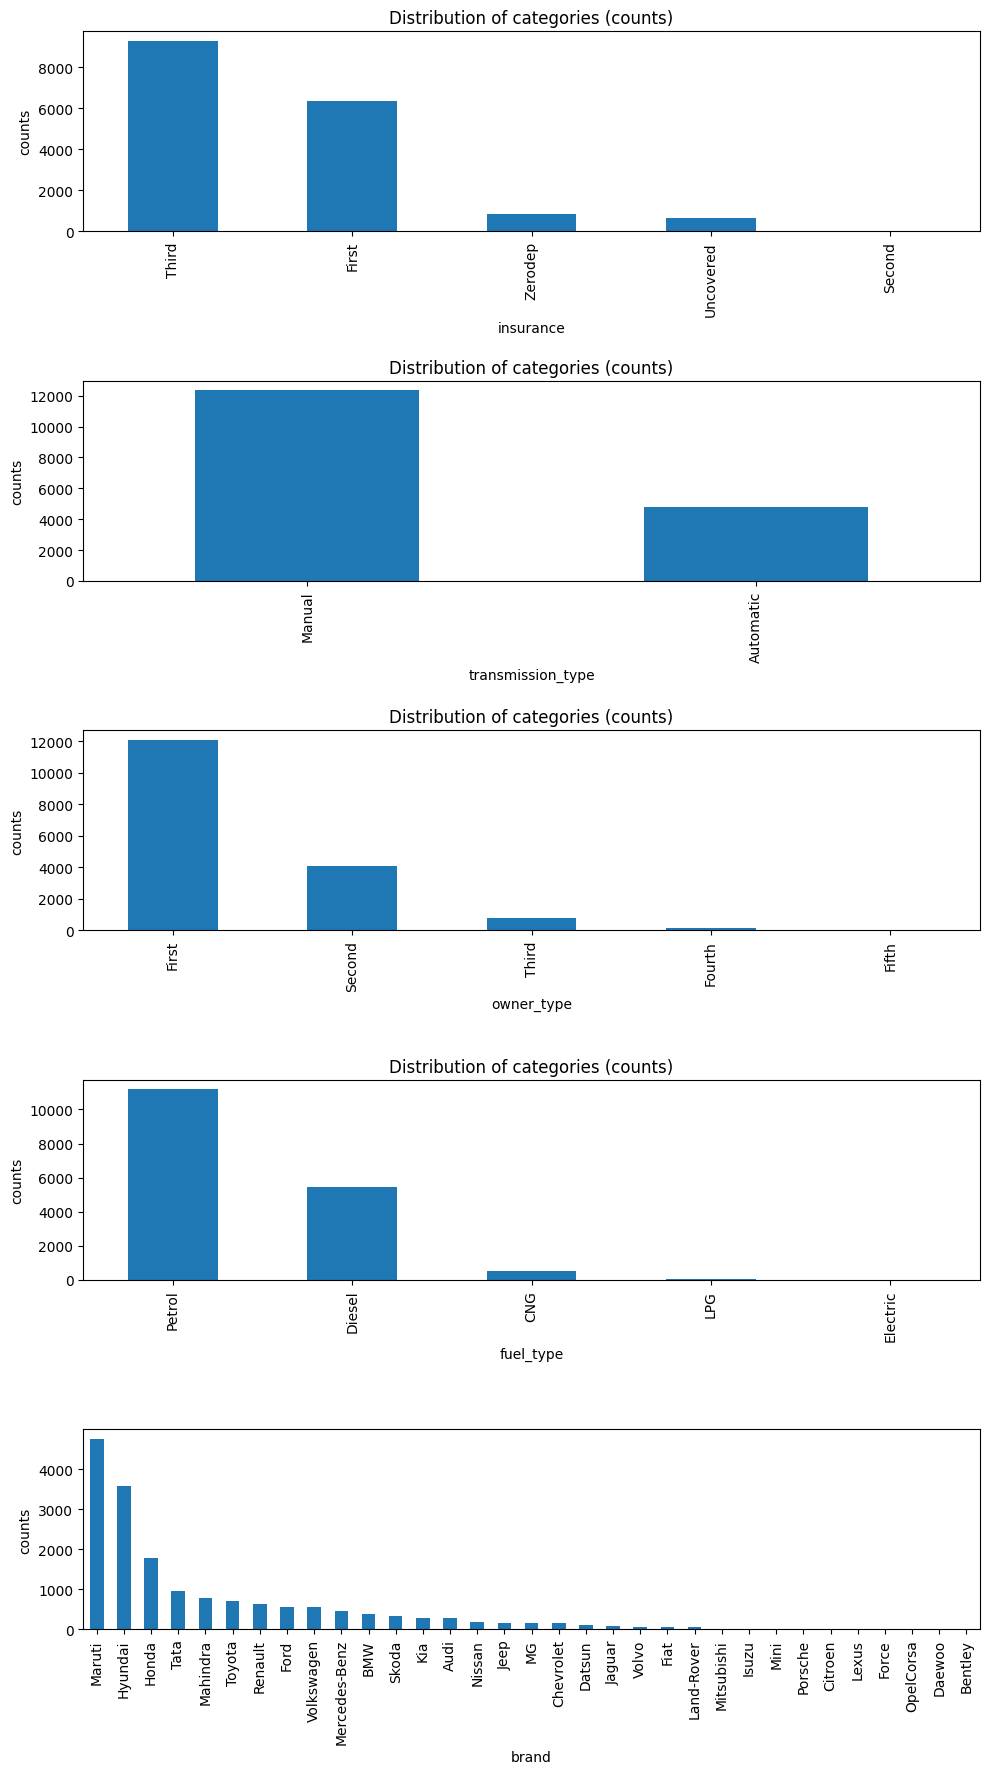

In [ ]:
cat_cl = ['insurance','transmission_type','owner_type','fuel_type','brand']
plt.figure(figsize=(10,20))

for count in range(len(cat_cl)):
  plt.title('Distribution of categories (counts)')
  plt.subplot(6,1,count+1)
  df[cat_cl[count]].value_counts().plot(kind='bar')
  plt.ylabel('counts')
  plt.xlabel(f'{cat_cl[count]}')
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

**Numerical Anlysis**

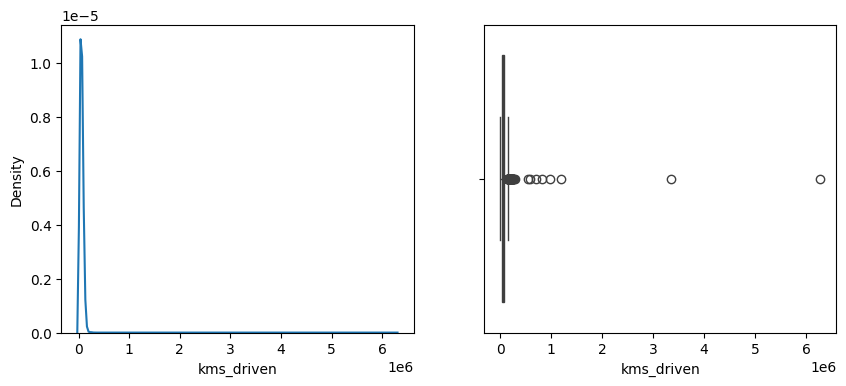

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.kdeplot(df['kms_driven'])
plt.subplot(122)
sns.boxplot(x=df['kms_driven'])
plt.show()

Conclusion:-outliers are present in kms_driven handle them by outliers
 techniques

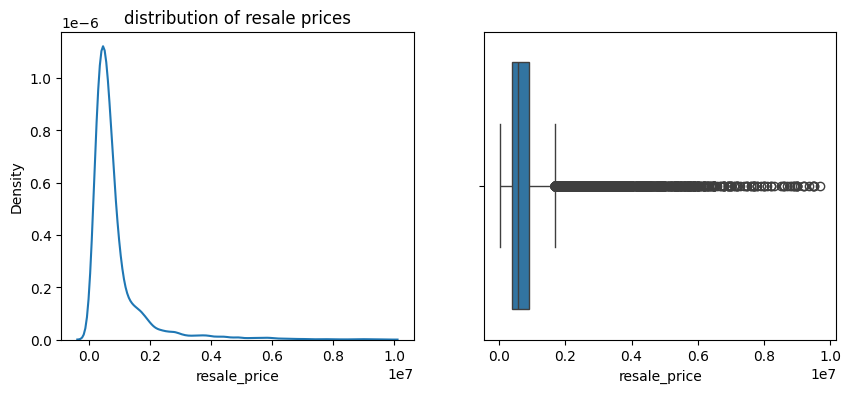

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('distribution of resale prices')
sns.kdeplot(df['resale_price'])
plt.subplot(122)
sns.boxplot(x=df['resale_price'])
plt.show()

<Axes: xlabel='registered_year'>

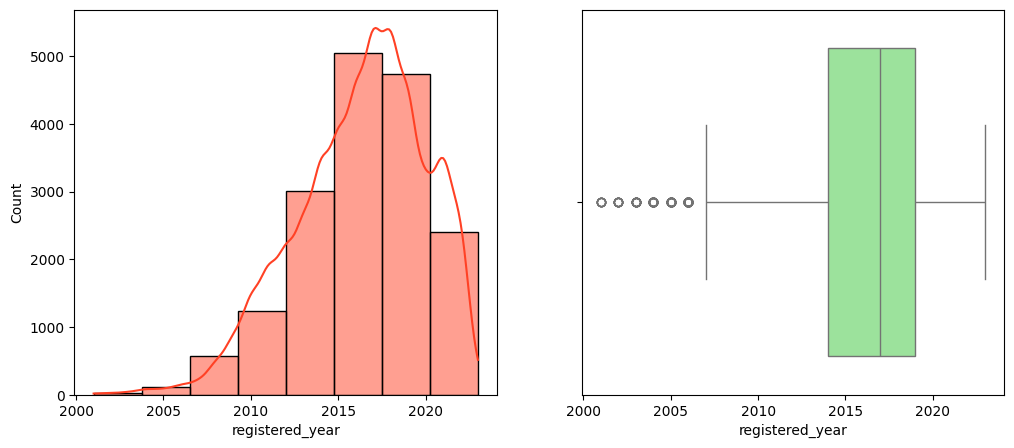

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['registered_year'],bins=8,color='#ff4125',kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df['registered_year'],color='lightgreen')

Conclusion: Registered Year data is slightly left skewed

<Axes: xlabel='engine_capacity'>

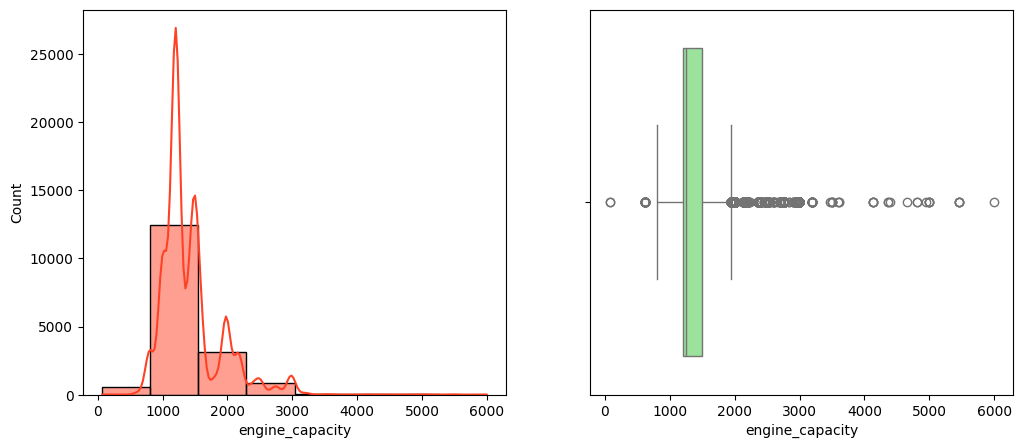

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['engine_capacity'],bins=8,color='#ff4125',kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df['engine_capacity'],color='lightgreen')

# **Multivariate Analysis**

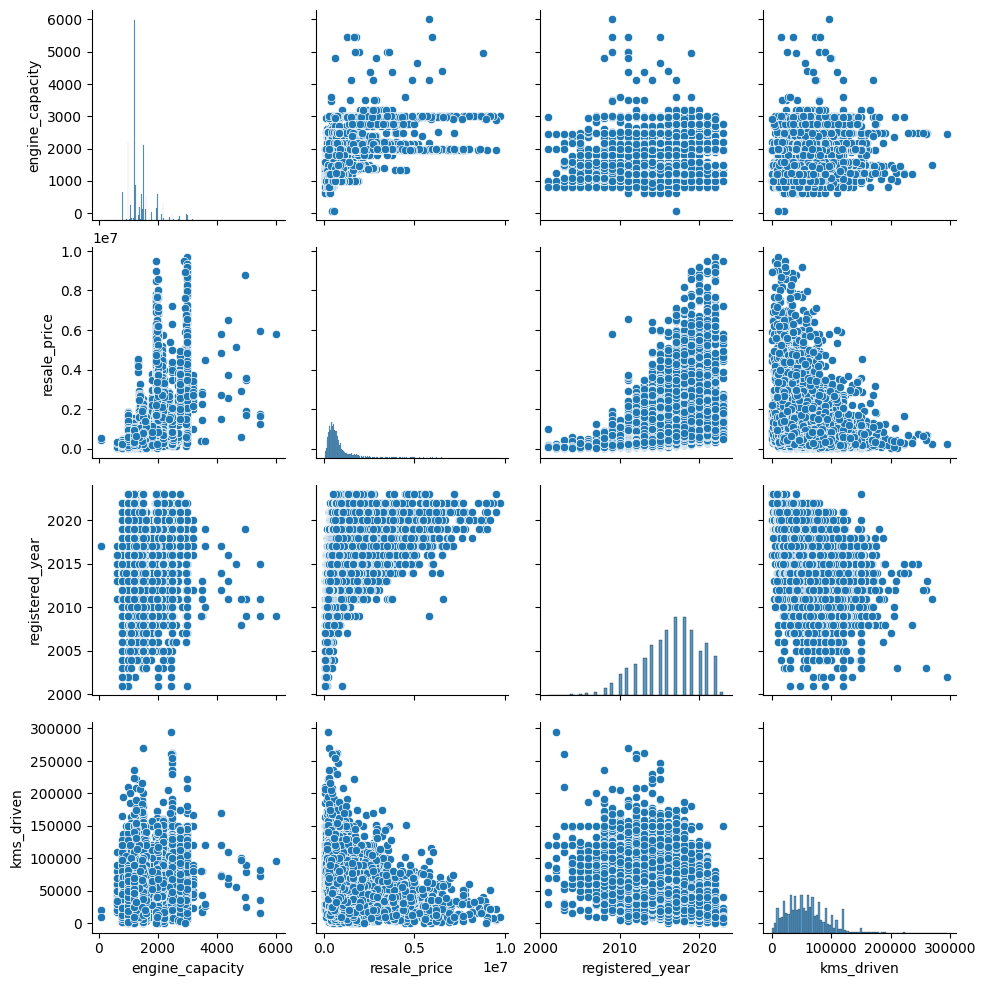

In [ ]:
a = df[df['kms_driven'] < 300000]
sns.pairplot(a)

Conclusion:

1: there is non-linear relationship bet kms_Driven and resale prices more the kms_driven by car lower the car resale price

2: there is non-linear relationship bet registered year and resale prices higher the year the car resale price will be higher


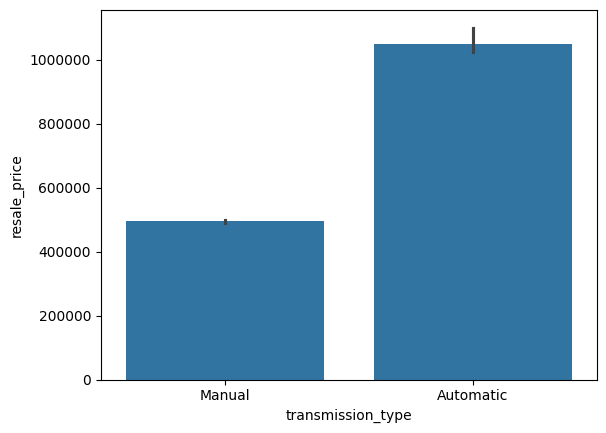

In [ ]:
sns.barplot(x=df['transmission_type'],y=df['resale_price'],estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

Conclusion: Average price of automatic cars is higher than manual

<Axes: xlabel='resale_price', ylabel='Density'>

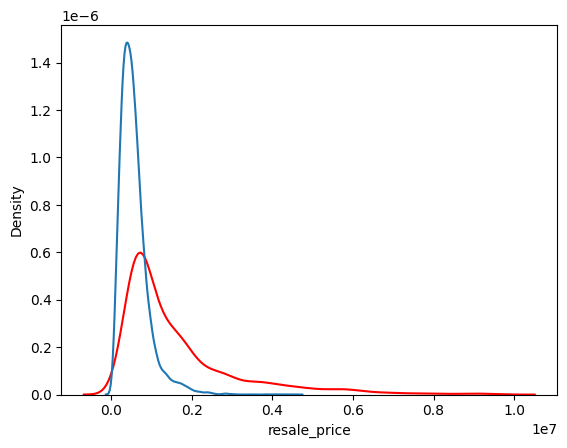

In [ ]:
automatic = df[df['transmission_type'] =='Automatic']
manual = df[df['transmission_type'] =='Manual']
sns.kdeplot(automatic['resale_price'],color='red')
sns.kdeplot(manual['resale_price'])

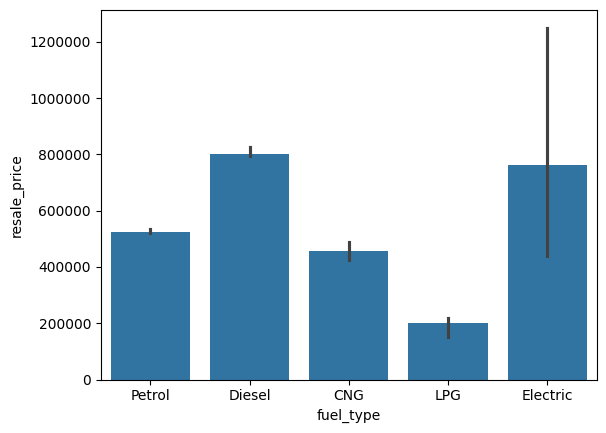

In [ ]:
sns.barplot(x=df['fuel_type'],y=df['resale_price'],estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

<Axes: xlabel='owner_type', ylabel='resale_price'>

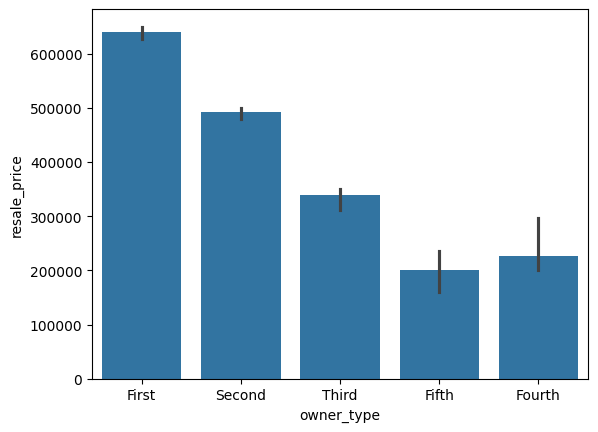

In [ ]:
sns.barplot(x=df['owner_type'],y=df['resale_price'],estimator=np.median)

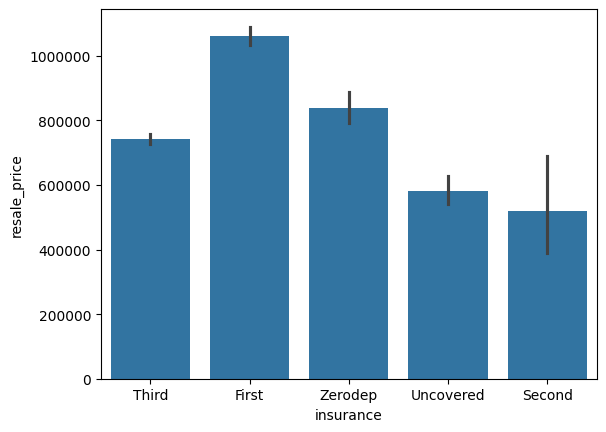

In [ ]:
sns.barplot(x=df['insurance'],y=df['resale_price'])
plt.ticklabel_format(style='plain', axis='y')

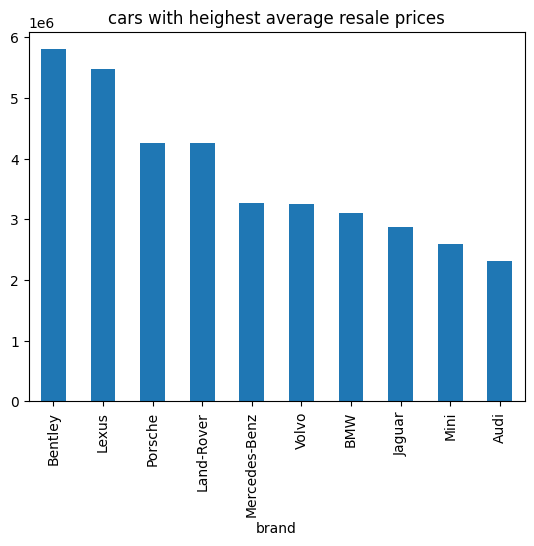

In [63]:
brands = df.groupby('brand')
brands['resale_price'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('cars with heighest average resale prices')
plt.show()